# XOR
En esta sección se aborda el caso clásico del problema XOR como ejemplo para entender por qué algunas funciones booleanas no son linealmente separables y cómo una red neuronal multicapa (MLP) puede resolverlas. Objetivos:
- Definir la función XOR y su tabla de verdad.
- Explicar por qué un único perceptrón no basta.
- Introducir la aproximación mediante una red con al menos una capa oculta.

Tabla de verdad de XOR:
- (0, 0) → 0
- (0, 1) → 1
- (1, 0) → 1
- (1, 1) → 0


## Datos
Descripción de los datos y su representación computacional:
- Entradas X: pares binarios que representan las combinaciones posibles.
- Salidas y: etiqueta binaria que indica el resultado de XOR.
- Notas: conjunto pequeño y determinista; no requiere particionado complejo para el objetivo pedagógico, pero en problemas reales conviene separar entrenamiento/validación/prueba.


In [1]:
import numpy as np

# Datos XOR
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])


## Red neuronal multicapa
Objetivo de diseño:
- Utilizar una red neuronal multicapa (MLP) que introduzca no linealidad suficiente para separar la función XOR.
- Justificación teórica: XOR no es linealmente separable, por lo que se necesita al menos una capa oculta con activaciones no lineales.


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

modelo = Sequential([
    Dense(4, activation='relu', input_dim=2),
    Dense(1, activation='sigmoid')
])


/home/nictez/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-11-03 18:46:32.365691: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Se utiliza Sequential para estructurar el modelo, añadiendo:
- Capas Dense (completamente conectadas) en la entrada y en la(s) capa(s) oculta(s).
- Funciones de activación no lineales (por ejemplo ReLU en capas ocultas).
- Una capa de salida con activación sigmoide para producir una probabilidad binaria.

Se añaden capas de entrada y ocultas densamente conectadas (Dense) con activación ReLU y una capa de salida con activación sigmoide para clasificar la respuesta en 1 y 0 (2 clases).

# Definir el modelo
modelo = Sequential()
modelo.add(Dense(2, input_dim=2, activation='relu'))
modelo.add(Dense(1, activation='sigmoid'))


Compilación del modelo:
- Optimizador: Adam, por su robustez y convergencia estable en muchos problemas.
- Tasa de aprendizaje propuesta: 0.01 (ajustable).
- Función de pérdida: binary_crossentropy, adecuada para problemas de clasificación binaria.
- Métricas: accuracy para seguimiento simple del rendimiento durante el entrenamiento.


In [3]:
from tensorflow.keras.optimizers import Adam

# Tasa de aprendizaje deseada
learning_rate = 0.01
adam_optimizer = Adam(learning_rate=learning_rate)

modelo.compile(
    optimizer=adam_optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)


## Entrenar el modelo
Procedimiento y consideraciones:
- Se entrena mediante el método fit usando los datos X e y.
- Épocas: número de iteraciones sobre todo el conjunto de entrenamiento (aquí se usa 50).
- Observaciones: en este problema concreto el dataset es muy pequeño; controlar sobreajuste no es crítico para la demostración, pero en entornos reales usar validación y regularización.


In [4]:
history = modelo.fit(
    X, y,
    epochs=50,
    verbose=2,
)


Epoch 1/50
1/1 - 1s - 637ms/step - accuracy: 0.5000 - loss: 0.7012
Epoch 2/50
1/1 - 0s - 38ms/step - accuracy: 0.2500 - loss: 0.6989
Epoch 3/50
1/1 - 0s - 42ms/step - accuracy: 0.5000 - loss: 0.6972
Epoch 4/50
1/1 - 0s - 43ms/step - accuracy: 0.2500 - loss: 0.6961
Epoch 5/50
1/1 - 0s - 40ms/step - accuracy: 0.2500 - loss: 0.6953
Epoch 6/50
1/1 - 0s - 37ms/step - accuracy: 0.2500 - loss: 0.6944
Epoch 7/50
1/1 - 0s - 34ms/step - accuracy: 0.2500 - loss: 0.6934
Epoch 8/50
1/1 - 0s - 39ms/step - accuracy: 0.2500 - loss: 0.6923
Epoch 9/50
1/1 - 0s - 38ms/step - accuracy: 0.2500 - loss: 0.6911
Epoch 10/50
1/1 - 0s - 30ms/step - accuracy: 0.2500 - loss: 0.6899
Epoch 11/50
1/1 - 0s - 31ms/step - accuracy: 0.5000 - loss: 0.6888
Epoch 12/50
1/1 - 0s - 35ms/step - accuracy: 0.5000 - loss: 0.6881
Epoch 13/50
1/1 - 0s - 32ms/step - accuracy: 0.5000 - loss: 0.6873
Epoch 14/50
1/1 - 0s - 29ms/step - accuracy: 0.5000 - loss: 0.6863
Epoch 15/50
1/1 - 0s - 30ms/step - accuracy: 0.5000 - loss: 0.6853
Epo

## Gráfica de la función de pérdida
Interpretación de la gráfica:
- Se traza la pérdida (loss) frente a las épocas para observar la convergencia.
- Objetivo: la curva de pérdida debe decrecer y estabilizarse; si no lo hace, ajustar tasa de aprendizaje, arquitectura o número de épocas.
- Esta visualización ayuda a detectar divergencia, estancamiento o sobreajuste.


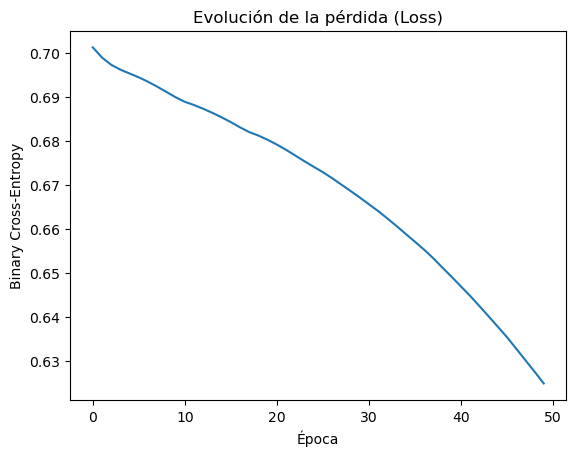

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Evolución de la pérdida (Loss)')
plt.xlabel('Época')
plt.ylabel('Binary Cross-Entropy')
plt.show()


Se espera que la función de pérdida tienda a valores bajos si el modelo aprende correctamente la relación XOR. Sin embargo, debido a la naturaleza discreta de la tarea, la métrica real de interés es la exactitud en las cuatro combinaciones.


## Evaluación
Cómo interpretar la evaluación:
- evaluate devuelve la pérdida y la precisión sobre el conjunto proporcionado.
- En problemas didácticos como XOR, la exactitud debe alcanzar 100% si la arquitectura y el entrenamiento son adecuados.
- En problemas reales, usar particiones de validación y prueba para evaluar generalización.


In [6]:
loss, accuracy = modelo.evaluate(X, y)
print(f'Loss: {loss}, Accuracy: {accuracy}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 1.0000 - loss: 0.6220
Loss: 0.6220372319221497, Accuracy: 1.0


## Predicción
Procedimiento para generar y revisar predicciones:
- Se usa modelo.predict sobre las entradas X.
- Se convierte la probabilidad en etiqueta binaria aplicando un umbral (por ejemplo 0.5).
- Se comparan las predicciones con las etiquetas reales para confirmar que el modelo ha aprendido la función XOR.
- Notas: mostrar cada entrada y su predicción facilita la interpretación en ejemplos pequeños.


In [7]:
pred = (modelo.predict(X) > 0.5).astype(int)
for i, (inp, p) in enumerate(zip(X, pred)):
    print(f"{inp} -> {p[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[0 0] -> 0
[0 1] -> 1
[1 0] -> 1
[1 1] -> 0
